In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:


df=pd.read_csv('NF-UQ-NIDS-v2.csv', nrows=1000000)
# df['Attack'].value_counts()

In [3]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,...,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2


In [4]:
df['Attack'].value_counts()

Benign            331059
DDoS              285935
DoS               235662
scanning           50360
Reconnaissance     34187
xss                32341
password           14996
injection           9006
Bot                 1884
Brute Force         1614
Infilteration       1568
Exploits             410
Fuzzers              294
Backdoor             241
Generic              220
mitm                  99
ransomware            43
Analysis              36
Theft                 23
Shellcode             18
Worms                  4
Name: Attack, dtype: int64

In [5]:
import ipaddress
def ip2long(ip):
  """
  Convert an IP string to long
  """
  return int(ipaddress.ip_address(ip))

df['IPV4_DST_ADDR']= df['IPV4_DST_ADDR'].apply(ip2long)
df['IPV4_SRC_ADDR']= df['IPV4_SRC_ADDR'].apply(ip2long)


In [6]:
df[(df['PROTOCOL'] != 1) & (df['ICMP_TYPE'] != 0)]['ICMP_TYPE'] = 0


/var/folders/hq/wmddrl5s3r335vwxtg6w7jz00000gn/T/ipykernel_27531/385319493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df['PROTOCOL'] != 1) & (df['ICMP_TYPE'] != 0)]['ICMP_TYPE'] = 0


In [7]:
# x_columns = df.columns.drop('Attack')
# x_columns = x_columns.drop('Dataset')
# x_columns = x_columns.drop('Label')

# #x = df[x_columns].values
# x_Label = df[x_columns]


In [8]:
# Convert to numpy - Classification
df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].astype('int64')
df['IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].astype('int64')
df['L4_SRC_PORT'] = df['L4_SRC_PORT'].astype('float64')
df['L4_DST_PORT'] = df['L4_DST_PORT'].astype('float64')
df['PROTOCOL'] = df['PROTOCOL'].astype('float64')
df['IN_BYTES'] = df['IN_BYTES'].astype('float64')
df['IN_PKTS'] = df['IN_PKTS'].astype('float64')
df['OUT_BYTES'] = df['OUT_BYTES'].astype('float64')
df['OUT_PKTS'] = df['OUT_PKTS'].astype('float64')
df['TCP_FLAGS'] = df['TCP_FLAGS'].astype('float64')
df['CLIENT_TCP_FLAGS'] = df['CLIENT_TCP_FLAGS'].astype('float64')
df['SERVER_TCP_FLAGS'] = df['SERVER_TCP_FLAGS'].astype('float64')
df['FLOW_DURATION_MILLISECONDS'] = df['FLOW_DURATION_MILLISECONDS'].astype('float64')
df['DURATION_IN'] = df['DURATION_IN'].astype('float64')
df['DURATION_OUT'] = df['DURATION_OUT'].astype('float64')
df['SRC_TO_DST_SECOND_BYTES'] = df['SRC_TO_DST_SECOND_BYTES'].astype('float64')
df['DST_TO_SRC_SECOND_BYTES'] = df['DST_TO_SRC_SECOND_BYTES'].astype('float64')

df['MIN_TTL'] = df['MIN_TTL'].astype('float64')
df['MAX_TTL'] = df['MAX_TTL'].astype('float64')
df['LONGEST_FLOW_PKT'] = df['LONGEST_FLOW_PKT'].astype('float64')
df['SHORTEST_FLOW_PKT'] = df['SHORTEST_FLOW_PKT'].astype('float64')
df['MIN_IP_PKT_LEN'] = df['MIN_IP_PKT_LEN'].astype('float64')
df['MAX_IP_PKT_LEN'] = df['MAX_IP_PKT_LEN'].astype('float64')
df['RETRANSMITTED_IN_BYTES'] = df['RETRANSMITTED_IN_BYTES'].astype('float64')
df['RETRANSMITTED_IN_PKTS'] = df['RETRANSMITTED_IN_PKTS'].astype('float64')
df['RETRANSMITTED_OUT_BYTES'] = df['RETRANSMITTED_OUT_BYTES'].astype('float64')
df['RETRANSMITTED_OUT_PKTS'] = df['RETRANSMITTED_OUT_PKTS'].astype('float64')
df['SRC_TO_DST_AVG_THROUGHPUT'] = df['SRC_TO_DST_AVG_THROUGHPUT'].astype('float64')
df['DST_TO_SRC_AVG_THROUGHPUT'] = df['DST_TO_SRC_AVG_THROUGHPUT'].astype('float64')
df['NUM_PKTS_UP_TO_128_BYTES'] = df['NUM_PKTS_UP_TO_128_BYTES'].astype('float64')
df['NUM_PKTS_128_TO_256_BYTES'] = df['NUM_PKTS_128_TO_256_BYTES'].astype('float64')
df['NUM_PKTS_256_TO_512_BYTES'] = df['NUM_PKTS_256_TO_512_BYTES'].astype('float64')
df['NUM_PKTS_512_TO_1024_BYTES'] = df['NUM_PKTS_512_TO_1024_BYTES'].astype('float64')
df['NUM_PKTS_1024_TO_1514_BYTES'] = df['NUM_PKTS_1024_TO_1514_BYTES'].astype('float64')
df['TCP_WIN_MAX_IN'] = df['TCP_WIN_MAX_IN'].astype('float64')
df['TCP_WIN_MAX_OUT'] = df['TCP_WIN_MAX_OUT'].astype('float64')
df['ICMP_TYPE'] = df['ICMP_TYPE'].astype('float64')
df['ICMP_IPV4_TYPE'] = df['ICMP_IPV4_TYPE'].astype('float64')
df['DNS_QUERY_ID'] = df['DNS_QUERY_ID'].astype('float64')
df['DNS_QUERY_TYPE'] = df['DNS_QUERY_TYPE'].astype('float64')
df['DNS_TTL_ANSWER'] = df['DNS_TTL_ANSWER'].astype('float64')

x_columns = df.columns.drop('Attack')
x_columns = x_columns.drop('Dataset')
x_columns = x_columns.drop('Label')

#x = df[x_columns].values
x = df[x_columns]

In [9]:
# df_ext = df.copy()
# df_ext1 = df.copy()
# df_ext2 = df.copy()
# df_ext_sort2 = df.copy()
# #df_ext1.add_suffix("_1")
# #df_ext2.add_suffix("_2")

# df_ext_sort = df_ext_sort2.sort_values(by=['IPV4_SRC_ADDR'], kind='mergesort')
# df_ext_sort

In [10]:
# df_ext_sort2 = df.copy()

# df_ext_sort = df_ext_sort2.sort_values(by=['IPV4_SRC_ADDR'], kind='mergesort')

# df_ext = df_ext_sort.copy()
# df_ext1 = df_ext_sort.copy()
# df_ext2 = df_ext_sort.copy()

# #df_ext1.add_suffix("_1")
# #df_ext2.add_suffix("_2")


# index = df_ext.index

# cols = df_ext.columns
# myarr = np.zeros((1,46))
# zero_df = pd.DataFrame(myarr, columns=cols)

# size =  index.size

# for i in range(index.size):
#     if i%1000 == 0:
#         print(i)

#     src_addr = df_ext.loc[index[i]]['IPV4_SRC_ADDR']

#     if (i > 0) and (df_ext.loc[index[i-1]]['IPV4_SRC_ADDR'] == src_addr) :
#         df_ext1.loc[index[i]] = df_ext.loc[index[i-1]]
#         if (i > 1) and (df_ext.loc[index[i-2]]['IPV4_SRC_ADDR'] == src_addr):
#             df_ext2.loc[index[i]] = df_ext.loc[index[i-2]]
#         else:
#             if (i < (size-1)) and (df_ext.loc[index[i+1]]['IPV4_SRC_ADDR'] == src_addr):
#                 df_ext2.loc[index[i]] = df_ext.loc[index[i+1]]
#             else:
#                 df_ext2.loc[index[i]] = zero_df.loc[0]
#     else:
#         if(i < (size-1)) and (df_ext.loc[index[i+1]]['IPV4_SRC_ADDR'] == src_addr):
#             df_ext1.loc[index[i]] = df_ext.loc[index[i+1]]
#             if (i < (size-2)) and (df_ext.loc[index[i+2]]['IPV4_SRC_ADDR'] == src_addr):
#                 df_ext2.loc[index[i]] = df_ext.loc[index[i+2]]
#             else:
#                 df_ext2.loc[index[i]] = zero_df.loc[0]
#         else:
#             df_ext1.loc[index[i]] = zero_df.loc[0]
#             df_ext2.loc[index[i]] = zero_df.loc[0]


# df_ext1 = df_ext1.add_suffix("_1")
# df_ext2 = df_ext2.add_suffix("_2")

# df_extend = pd.concat([df_ext, df_ext1, df_ext2], axis=1)

# # df_extend.to_csv(colab_path + "NF-UQ-NIDS-v2_300K_extend.csv")

  

In [11]:
# df_extend.to_csv("NF-UQ-NIDS-v2_300K_extend.csv")

In [12]:
# #전처리된 데이터 로드
# #f_orig = pd.read_csv(colab_path + 'data_processed/kdd_processed.csv')
# df_orig = pd.read_csv("NF-UQ-NIDS-v2_300K_extend1.csv",index_col=0, nrows=300000)
# df = df_orig.copy()

In [13]:
# df = df[x_columns]
# x=x.astype(float)

In [14]:
# x['DNS_QUERY_TYPE'].value_counts()

In [15]:
# x=pd.get_dummies(x,columns=['TCP_FLAGS'])

# x=pd.get_dummies(x,columns=['ICMP_TYPE'])

# x=pd.get_dummies(x,columns=['DNS_QUERY_TYPE'])



In [16]:
# def plot_data(X:np.ndarray,y:np.ndarray):
#     plt.scatter(X[y==0,0],X[y==0,1],label="Label 0",alpha=0.5,linewidth=0.15)
#     plt.scatter(X[y==1,0],X[y==1,1],label="Label 1",alpha=0.5,linewidth=0.15,c='r')
#     plt.legend()
#     return plt.show()

In [17]:
# X1,y1=prep_data(df)

In [20]:
# # 확장판에서 사용
# #cols = df.columns.drop(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'DNS_QUERY_ID','Label','Attack','Dataset'])  #명목형변수, 레이블 변수 제외
# cols = df.columns.drop(['IPV4_SRC_ADDR_1','IPV4_SRC_ADDR_2','Label','Attack','Dataset', 'Label_1','Attack_1','Dataset_1', 'Label_2','Attack_2','Dataset_2'])  #명목형변수, 레이블 변수 제외
# #cols = df.columns.drop(['Attack','Dataset'])  #명목형변수, 레이블 변수 제외
# X = df[cols]
# dummies = pd.get_dummies(df['Attack']) # Classification
# outcomes = dummies.columns
# num_classes = len(outcomes)
# Y = dummies.values
# #X.shape

In [21]:
dummies = pd.get_dummies(df['Attack']) # Classification
dummiesLabel = pd.get_dummies(df['Label']) # Classification
y_1_label=df['Label'].values
outcomes = dummies.columns
num_classes = len(outcomes)
Y = dummies.values
y_label = dummiesLabel.values

In [22]:
def max_8G(val):
    if (val > 1.0e+9): return 1.0e+9
    return val
X = x.applymap(max_8G)


In [172]:
dummies

,Analysis,Backdoor,Benign,Bot,Brute Force,DDoS,DoS,Exploits,Fuzzers,Generic,...,Reconnaissance,Shellcode,Theft,Worms,injection,mitm,password,ransomware,scanning,xss
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999998,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
Y.shape

(1000000, 21)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler=scaler.fit(X)
X = pd.DataFrame(scaler.transform(X),index=np.arange(0,1000000,1), columns = X.columns)

In [25]:
def max_3sigma(val):
    if (val < -3): return -3
    if (val > 3): return 3
    return val


In [26]:
X = X.applymap(max_3sigma)

In [27]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle = True, random_state=64)
x_train_label, x_test_label, y_train_label, y_test_label = train_test_split(X, y_label, test_size=0.20, shuffle = True, random_state=64)

In [29]:
y1 = tf.argmax(dummies, axis=1)
y1=y1.numpy()
y1.shape

2023-08-24 23:14:52.209971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1000000,)

In [228]:
y1

array([6, 6, 2, ..., 6, 5, 5])

In [30]:
#for stacking
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X, y1, test_size=0.20, shuffle = True, random_state=64)
x_train_1_label, x_test_1_label, y_train_1_label, y_test_1_label = train_test_split(X, y_1_label, test_size=0.20, shuffle = True, random_state=64)


(200000, 43)

In [141]:
y1

(1000000,)

<AxesSubplot:>

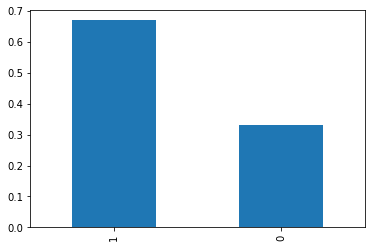

In [32]:
df['Label'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

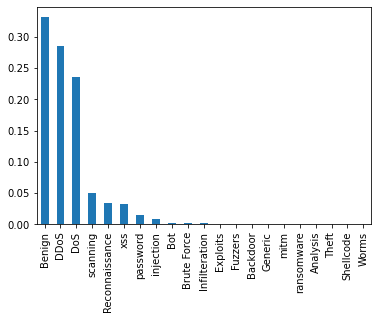

In [33]:
df['Attack'].value_counts(normalize=True).plot(kind='bar')

In [34]:
# df[df['Attack']=='Benign'].sample(10)

In [35]:
print(df['Attack'].value_counts(normalize=True)*100)

Benign            33.1059
DDoS              28.5935
DoS               23.5662
scanning           5.0360
Reconnaissance     3.4187
xss                3.2341
password           1.4996
injection          0.9006
Bot                0.1884
Brute Force        0.1614
Infilteration      0.1568
Exploits           0.0410
Fuzzers            0.0294
Backdoor           0.0241
Generic            0.0220
mitm               0.0099
ransomware         0.0043
Analysis           0.0036
Theft              0.0023
Shellcode          0.0018
Worms              0.0004
Name: Attack, dtype: float64


In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
smote = SMOTE(random_state=64,k_neighbors=1)
x_train_over,y_train_over = smote.fit_resample(x_train,y_train)

In [38]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (800000, 43) (800000, 21)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (5560296, 43) (5560296, 21)


In [220]:
#for stacking
from sklearn.model_selection import train_test_split
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(x_train_over, y_train_over, test_size=0.20, shuffle = True, random_state=64)

In [153]:
print(x_train_o.shape)
print(x_test_o.shape)
print(y_train_o.shape)
print(y_test_o.shape)


(4448236, 43)
(1112060, 43)
(4448236, 21)
(1112060, 21)


(800000, 21)

In [225]:
x_test_1

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE
406195,0.197183,-1.821395,0.132472,0.311372,-0.749746,-0.675294,-0.013180,-0.015134,-0.011857,-0.024220,...,-0.007923,-0.011453,-0.145491,-0.473522,-0.325240,-0.32524,-0.338858,-0.139324,-0.002281,-0.075062
733468,0.197183,0.024474,0.132472,3.000000,-0.749746,-0.675294,-0.013180,-0.015134,-0.011857,-0.024220,...,-0.007923,-0.011453,-0.145491,-0.473522,-0.325240,-0.32524,-0.338858,-0.139324,-0.002281,-0.075062
845213,-2.642731,-1.037201,0.132472,0.002612,-0.749746,-0.675294,0.007282,-0.002410,-0.004990,0.011232,...,0.014757,-0.006006,0.163889,3.000000,-0.325240,-0.32524,-0.338858,-0.139324,-0.002281,-0.075062
459951,0.197183,-1.711391,0.132472,-0.306428,-0.749746,-0.586524,-0.009818,-0.013316,-0.011857,-0.024220,...,-0.007923,-0.011453,-0.416198,-0.473522,2.781079,2.78108,-0.338858,-0.139324,-0.002281,-0.075062
708178,0.197183,-0.180231,0.132472,-0.306428,-0.749746,-0.586524,-0.009818,-0.013316,-0.011857,-0.024220,...,-0.007923,-0.011453,-0.416198,-0.473522,-0.325240,-0.32524,-0.338858,-0.139324,-0.002281,-0.075062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394032,0.197183,-2.081401,0.132472,-0.306428,-0.749746,-0.586524,-0.011847,-0.015134,-0.011710,-0.019156,...,-0.007923,-0.011453,-0.416198,-0.473522,-0.325240,-0.32524,-0.338858,-0.139324,-0.002281,-0.075062
268325,0.197183,0.370117,0.132472,-0.306428,-0.749746,-0.586524,-0.007789,-0.011499,-0.011857,-0.024220,...,-0.007923,-0.011453,-0.416198,-0.473522,2.781079,2.78108,-0.338858,-0.139324,-0.002281,-0.075062
865122,0.197183,-0.858925,0.132472,-0.306428,-0.749746,-0.586524,-0.007789,-0.011499,-0.011857,-0.024220,...,-0.007923,-0.011453,-0.416198,-0.473522,2.781079,2.78108,-0.338858,-0.139324,-0.002281,-0.075062
729890,0.197183,-1.090114,0.132472,-0.306428,1.197771,1.708814,-0.013064,-0.013316,-0.011857,-0.024220,...,-0.007923,-0.011453,-0.454870,-0.473522,-0.325240,-0.32524,-0.338858,-0.139324,-0.002281,-0.075062


In [198]:
dummies_o=pd.DataFrame(y_train_over)

In [199]:
dummies_o

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5560292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5560293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5560294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [187]:
dummies

,Analysis,Backdoor,Benign,Bot,Brute Force,DDoS,DoS,Exploits,Fuzzers,Generic,...,Reconnaissance,Shellcode,Theft,Worms,injection,mitm,password,ransomware,scanning,xss
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999998,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
y1_o = tf.argmax(dummies_o, axis=1)
y1_o=y1_o.numpy()
y1_o.shape

(5560296,)

In [232]:
#for stacking
from sklearn.model_selection import train_test_split
x_train_1_o, x_test_1_o, y_train_1_o, y_test_1_o = train_test_split(x_train_over, y1_o, test_size=0.20, shuffle = True, random_state=64)


In [ ]:
# df['Attack'].value_counts(normalize=True).plot(kind='bar')

In [168]:
#model1

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=x_train_over.shape[1], bias_initializer="zeros", activation='relu'),
    tf.keras.layers.Dense(128, input_dim=x_train_over.shape[1], bias_initializer="zeros", activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, input_dim=x_train_over.shape[1], bias_initializer="zeros", activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, input_dim=x_train_over.shape[1],  bias_initializer="zeros", activation='relu'),
    tf.keras.layers.Dense(y_train_over.shape[1],activation='softmax')
    ])

In [167]:
Y.shape

(1000000, 21)

In [169]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                2816      
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 21)               

In [171]:
#model 1
import datetime
model_1.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

log_dir_1 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

monitor_1 = [
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=8, verbose=1, mode='auto',restore_best_weights=True),
             tf.keras.callbacks.TensorBoard(log_dir=log_dir_1, histogram_freq=1)
            ]

history_1  = model_1.fit(x_train_o,y_train_o,validation_data=(x_test_o,y_test_o), callbacks=[monitor_1],verbose=2, batch_size=1024, epochs=100)

Epoch 1/100
4344/4344 - 18s - loss: 0.3657 - accuracy: 0.8766 - val_loss: 0.2160 - val_accuracy: 0.9227 - 18s/epoch - 4ms/step
Epoch 2/100
4344/4344 - 17s - loss: 0.2291 - accuracy: 0.9209 - val_loss: 0.1907 - val_accuracy: 0.9313 - 17s/epoch - 4ms/step
Epoch 3/100
4344/4344 - 17s - loss: 0.2116 - accuracy: 0.9260 - val_loss: 0.1834 - val_accuracy: 0.9342 - 17s/epoch - 4ms/step
Epoch 4/100
4344/4344 - 17s - loss: 0.2033 - accuracy: 0.9285 - val_loss: 0.1786 - val_accuracy: 0.9354 - 17s/epoch - 4ms/step
Epoch 5/100
4344/4344 - 17s - loss: 0.1981 - accuracy: 0.9301 - val_loss: 0.1779 - val_accuracy: 0.9360 - 17s/epoch - 4ms/step
Epoch 6/100
4344/4344 - 17s - loss: 0.1946 - accuracy: 0.9312 - val_loss: 0.1738 - val_accuracy: 0.9370 - 17s/epoch - 4ms/step
Epoch 7/100
4344/4344 - 17s - loss: 0.1916 - accuracy: 0.9320 - val_loss: 0.1702 - val_accuracy: 0.9382 - 17s/epoch - 4ms/step
Epoch 8/100
4344/4344 - 17s - loss: 0.1892 - accuracy: 0.9328 - val_loss: 0.1700 - val_accuracy: 0.9382 - 17s/e

In [173]:
#Saving the second model
model_1.save('model1.h5')

In [174]:
#Training  model 2  with different structure
model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(64, input_dim=x_train_over.shape[1],  activation='relu'),
      tf.keras.layers.Dense(128, input_dim=x_train_over.shape[1],  activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(256, input_dim=x_train_over.shape[1], activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, input_dim=x_train_over.shape[1], activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(y_train_over.shape[1],activation='softmax')
      ])

In [72]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                2816      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [175]:
#from tensorflow.keras.callbacks import EarlyStopping

model_2.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

log_dir_2 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

monitor_2 = [
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=8, verbose=1, mode='auto',restore_best_weights=True),
             tf.keras.callbacks.TensorBoard(log_dir=log_dir_2, histogram_freq=1)
            ]
history_2  = model_2.fit(x_train_over,y_train_over,validation_data=(x_test_o,y_test_o), callbacks=[monitor_2],verbose=2, batch_size=512, epochs=100)


Epoch 1/100
10860/10860 - 42s - loss: 0.2792 - accuracy: 0.9030 - val_loss: 0.1906 - val_accuracy: 0.9313 - 42s/epoch - 4ms/step
Epoch 2/100
10860/10860 - 41s - loss: 0.2017 - accuracy: 0.9281 - val_loss: 0.1759 - val_accuracy: 0.9356 - 41s/epoch - 4ms/step
Epoch 3/100
10860/10860 - 40s - loss: 0.1913 - accuracy: 0.9313 - val_loss: 0.1702 - val_accuracy: 0.9383 - 40s/epoch - 4ms/step
Epoch 4/100
10860/10860 - 41s - loss: 0.1854 - accuracy: 0.9334 - val_loss: 0.1657 - val_accuracy: 0.9389 - 41s/epoch - 4ms/step
Epoch 5/100
10860/10860 - 40s - loss: 0.1817 - accuracy: 0.9347 - val_loss: 0.1647 - val_accuracy: 0.9390 - 40s/epoch - 4ms/step
Epoch 6/100
10860/10860 - 39s - loss: 0.1789 - accuracy: 0.9359 - val_loss: 0.1608 - val_accuracy: 0.9415 - 39s/epoch - 4ms/step
Epoch 7/100
10860/10860 - 39s - loss: 0.1766 - accuracy: 0.9369 - val_loss: 0.1593 - val_accuracy: 0.9416 - 39s/epoch - 4ms/step
Epoch 8/100
10860/10860 - 39s - loss: 0.1748 - accuracy: 0.9377 - val_loss: 0.1562 - val_accuracy

In [176]:
#Saving the second model
model_2.save('model2.h5')

In [177]:
#3 rd model for stack
model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(64, input_dim=x_train_over.shape[1],activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(128, input_dim=x_train_over.shape[1],activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(128, input_dim=x_train_over.shape[1],activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(256, input_dim=x_train_over.shape[1], activation='relu'),
      tf.keras.layers.Dense(y_train_over.shape[1],activation='softmax')
      ])

In [178]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                2816      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 128)               8320      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_38 (Dense)            (None, 256)              

In [179]:

model_3.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

monitor_3 = [
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=16, verbose=1, mode='auto',restore_best_weights=True),
             tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
            ]
history_3  = model_3.fit(x_train_over,y_train_over,validation_data=(x_test_o,y_test_o), callbacks=[monitor_3],verbose=2, batch_size=512, epochs=100)

Epoch 1/100
10860/10860 - 38s - loss: 0.3343 - accuracy: 0.8840 - val_loss: 0.2056 - val_accuracy: 0.9269 - 38s/epoch - 3ms/step
Epoch 2/100
10860/10860 - 36s - loss: 0.2364 - accuracy: 0.9168 - val_loss: 0.1919 - val_accuracy: 0.9308 - 36s/epoch - 3ms/step
Epoch 3/100
10860/10860 - 36s - loss: 0.2232 - accuracy: 0.9208 - val_loss: 0.1862 - val_accuracy: 0.9324 - 36s/epoch - 3ms/step
Epoch 4/100
10860/10860 - 36s - loss: 0.2162 - accuracy: 0.9231 - val_loss: 0.1819 - val_accuracy: 0.9343 - 36s/epoch - 3ms/step
Epoch 5/100
10860/10860 - 36s - loss: 0.2117 - accuracy: 0.9245 - val_loss: 0.1793 - val_accuracy: 0.9340 - 36s/epoch - 3ms/step
Epoch 6/100
10860/10860 - 35s - loss: 0.2086 - accuracy: 0.9255 - val_loss: 0.1750 - val_accuracy: 0.9360 - 35s/epoch - 3ms/step
Epoch 7/100
10860/10860 - 35s - loss: 0.2058 - accuracy: 0.9263 - val_loss: 0.1739 - val_accuracy: 0.9363 - 35s/epoch - 3ms/step
Epoch 8/100
10860/10860 - 35s - loss: 0.2037 - accuracy: 0.9270 - val_loss: 0.1747 - val_accuracy

10860/10860 - 35s - loss: 0.1820 - accuracy: 0.9353 - val_loss: 0.1564 - val_accuracy: 0.9428 - 35s/epoch - 3ms/step
Epoch 65/100
10860/10860 - 35s - loss: 0.1822 - accuracy: 0.9350 - val_loss: 0.1571 - val_accuracy: 0.9433 - 35s/epoch - 3ms/step
Epoch 66/100
10860/10860 - 35s - loss: 0.1821 - accuracy: 0.9350 - val_loss: 0.1584 - val_accuracy: 0.9414 - 35s/epoch - 3ms/step
Epoch 67/100
10860/10860 - 36s - loss: 0.1819 - accuracy: 0.9351 - val_loss: 0.1580 - val_accuracy: 0.9423 - 36s/epoch - 3ms/step
Epoch 68/100
10860/10860 - 36s - loss: 0.1821 - accuracy: 0.9351 - val_loss: 0.1567 - val_accuracy: 0.9432 - 36s/epoch - 3ms/step
Epoch 69/100
10860/10860 - 36s - loss: 0.1816 - accuracy: 0.9354 - val_loss: 0.1592 - val_accuracy: 0.9419 - 36s/epoch - 3ms/step
Epoch 70/100
10860/10860 - 35s - loss: 0.1819 - accuracy: 0.9351 - val_loss: 0.1569 - val_accuracy: 0.9433 - 35s/epoch - 3ms/step
Epoch 71/100
10860/10860 - 35s - loss: 0.1816 - accuracy: 0.9356 - val_loss: 0.1569 - val_accuracy: 0.9

In [180]:
#Saving the second model
model_3.save('model3.h5')

In [181]:
#4 rd model for stack
model_4 = tf.keras.Sequential([
      tf.keras.layers.Dense(128, input_dim=x_train_over.shape[1],  activation='relu'),
      tf.keras.layers.Dense(64, input_dim=x_train_over.shape[1],  activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(32, input_dim=x_train_over.shape[1], activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, input_dim=x_train_over.shape[1], activation='relu'),
      tf.keras.layers.Dense(y_train_over.shape[1],activation='softmax')
      ])

In [182]:
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               5632      
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_43 (Dense)            (None, 128)               4224      
                                                                 
 dense_44 (Dense)            (None, 21)               

In [183]:
model_4.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

log_dir_4 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

monitor_4 = [
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=16, verbose=1, mode='auto',restore_best_weights=True),
             tf.keras.callbacks.TensorBoard(log_dir=log_dir_4, histogram_freq=1)
            ]
history_4  = model_4.fit(x_train_over,y_train_over,validation_data=(x_test_o,y_test_o), callbacks=[monitor_4],verbose=2, batch_size=512, epochs=100)

Epoch 1/100
10860/10860 - 25s - loss: 0.3506 - accuracy: 0.8807 - val_loss: 0.2114 - val_accuracy: 0.9254 - 25s/epoch - 2ms/step
Epoch 2/100
10860/10860 - 24s - loss: 0.2422 - accuracy: 0.9162 - val_loss: 0.1995 - val_accuracy: 0.9294 - 24s/epoch - 2ms/step
Epoch 3/100
10860/10860 - 25s - loss: 0.2253 - accuracy: 0.9214 - val_loss: 0.1909 - val_accuracy: 0.9327 - 25s/epoch - 2ms/step
Epoch 4/100
10860/10860 - 24s - loss: 0.2160 - accuracy: 0.9244 - val_loss: 0.1884 - val_accuracy: 0.9327 - 24s/epoch - 2ms/step
Epoch 5/100
10860/10860 - 23s - loss: 0.2097 - accuracy: 0.9266 - val_loss: 0.1810 - val_accuracy: 0.9359 - 23s/epoch - 2ms/step
Epoch 6/100
10860/10860 - 23s - loss: 0.2056 - accuracy: 0.9280 - val_loss: 0.1811 - val_accuracy: 0.9365 - 23s/epoch - 2ms/step
Epoch 7/100
10860/10860 - 23s - loss: 0.2019 - accuracy: 0.9292 - val_loss: 0.1811 - val_accuracy: 0.9364 - 23s/epoch - 2ms/step
Epoch 8/100
10860/10860 - 23s - loss: 0.1991 - accuracy: 0.9302 - val_loss: 0.1743 - val_accuracy

In [184]:
model_4.save('model4.h5')

In [83]:
# #4 rd model for stack
# model_55 = tf.keras.Sequential([
#       tf.keras.layers.Dense(64, input_dim=X.shape[1],  activation='relu'),
#       tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'),
#       tf.keras.layers.Dropout(0.3),
#       tf.keras.layers.Dense(128, input_dim=X.shape[1],  activation='relu'),
#       tf.keras.layers.Dropout(0.3),
#       tf.keras.layers.Dense(64, input_dim=X.shape[1],  activation='relu'),
#       tf.keras.layers.Dense(y_label.shape[1],activation='sigmoid')
#       ])

In [84]:
# model_55.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

# log_dir_55 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# monitor_55 = [
#              tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=16, verbose=1, mode='auto',restore_best_weights=True),
#              tf.keras.callbacks.TensorBoard(log_dir=log_dir_55, histogram_freq=1)
#             ]
# history_55  = model_55.fit(x_train_label,y_train_label,validation_data=(x_test_label,y_test_label), callbacks=[monitor_55],verbose=2, batch_size=512, epochs=100)

In [85]:
# model_55.save('model5.h5')

In [233]:
# load models from file
# for both logistic and nueral
def load_all_models(n_models):
	all_models = list()

	for i in range(n_models):
		# define filename for this ensemble
		filename = 'model' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename,custom_objects=None)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

In [234]:
# define stacked model from multiple member input models
#neural

def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i + 1) + '_' + layer.name


	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(64, activation='relu',name="dense_a")(merge)
# 	hidden1 = Dense(128, activation='relu',name="dense_b")(hidden)
# 	hidden2 = Dense(128, activation='relu',name="dense_c")(hidden1)    
	output = Dense(21, activation='softmax',name="dense_d")(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	model.summary()
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [235]:
import datetime

In [236]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [237]:
monitor_6= [
             tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
            ]

In [238]:
# fit a stacked model
#neural
def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	inputy_enc = to_categorical(inputy)
	# fit model
	history_6=model.fit(X, inputy_enc, epochs=32, verbose=2,callbacks=[monitor_6])

In [239]:
# make a prediction with a stacked model
#neural
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=2)

In [240]:
# load all models
#neural
from keras.models import load_model
n_members = 4
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded model1.h5
>loaded model2.h5
>loaded model3.h5
>loaded model4.h5
Loaded 4 models


In [241]:
# define ensemble model
import matplotlib.pyplot as plt
#from keras.utils import plot_model
#neural
#from keras.layers.merge import concatenate
from keras.layers import concatenate
from keras.layers import Dense
from keras.models import Model
from tensorflow.keras.utils import plot_model

stacked_model = define_stacked_model(members)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 dense_30_input (InputLayer)    [(None, 43)]         0           []                               
                                                                                                  
 dense_35_input (InputLayer)    [(None, 43)]         0           []                               
                                                                                                  
 dense_25_input (InputLayer)    [(None, 43)]         0           []                               
                                                                                                  
 ensemble_2_dense_30 (Dense) 

 concatenate_5 (Concatenate)    (None, 84)           0           ['ensemble_1_dense_29[0][0]',    
                                                                  'ensemble_2_dense_34[0][0]',    
                                                                  'ensemble_3_dense_39[0][0]',    
                                                                  'ensemble_4_dense_44[0][0]']    
                                                                                                  
 dense_a (Dense)                (None, 64)           5440        ['concatenate_5[0][0]']          
                                                                                                  
 dense_d (Dense)                (None, 21)           1365        ['dense_a[0][0]']                
                                                                                                  
Total params: 212,809
Trainable params: 6,805
Non-trainable params: 206,004
_________________________________

In [242]:
from keras.utils import to_categorical
inputy_enc = to_categorical(y_test_1_o)
print(y_test_1_o.shape)
print(inputy_enc.shape)
y_test_1_o.shape

(1112060,)
(1112060, 21)


(1112060,)

array([ 3, 20, 15, ..., 15,  9, 20])

In [244]:
from keras.utils import to_categorical
# fit stacked model on test dataset
#neural
fit_stacked_model(stacked_model, x_test_1_o, y_test_1_o)

Epoch 1/32
34752/34752 - 33s - loss: 0.1601 - accuracy: 0.9492 - 33s/epoch - 947us/step
Epoch 2/32
34752/34752 - 34s - loss: 0.1468 - accuracy: 0.9500 - 34s/epoch - 978us/step
Epoch 3/32
34752/34752 - 33s - loss: 0.1455 - accuracy: 0.9503 - 33s/epoch - 949us/step
Epoch 4/32
34752/34752 - 33s - loss: 0.1452 - accuracy: 0.9503 - 33s/epoch - 955us/step
Epoch 5/32
34752/34752 - 34s - loss: 0.1449 - accuracy: 0.9502 - 34s/epoch - 969us/step
Epoch 6/32
34752/34752 - 33s - loss: 0.1445 - accuracy: 0.9503 - 33s/epoch - 957us/step
Epoch 7/32
34752/34752 - 35s - loss: 0.1446 - accuracy: 0.9501 - 35s/epoch - 1ms/step
Epoch 8/32
34752/34752 - 33s - loss: 0.1441 - accuracy: 0.9503 - 33s/epoch - 950us/step
Epoch 9/32
34752/34752 - 36s - loss: 0.1437 - accuracy: 0.9504 - 36s/epoch - 1ms/step
Epoch 10/32
34752/34752 - 34s - loss: 0.1438 - accuracy: 0.9504 - 34s/epoch - 973us/step
Epoch 11/32
34752/34752 - 32s - loss: 0.1440 - accuracy: 0.9504 - 32s/epoch - 922us/step
Epoch 12/32
34752/34752 - 32s - lo

In [253]:
from sklearn.metrics import classification_report
target_names = dummies.columns.values 
print(classification_report(y_test_1_o, yhat_val,target_names=target_names))


                precision    recall  f1-score   support

      Analysis       0.80      1.00      0.89     52943
      Backdoor       1.00      0.95      0.97     53229
        Benign       0.96      0.75      0.84     53059
           Bot       1.00      1.00      1.00     52843
   Brute Force       1.00      0.98      0.99     52668
          DDoS       0.97      0.99      0.98     52853
           DoS       0.95      0.97      0.96     52674
      Exploits       1.00      0.94      0.97     53047
       Fuzzers       1.00      0.91      0.95     53247
       Generic       1.00      0.95      0.97     53102
 Infilteration       0.79      0.93      0.85     52983
Reconnaissance       0.89      0.88      0.89     52788
     Shellcode       1.00      1.00      1.00     53176
         Theft       1.00      1.00      1.00     52724
         Worms       1.00      1.00      1.00     52718
     injection       0.94      0.89      0.91     53005
          mitm       0.98      1.00      0.99  

In [248]:

from sklearn.metrics import accuracy_score
import numpy as np
# make predictions and evaluate
#neural
yhat = predict_stacked_model(stacked_model, x_test_1_o)
yhat_val = tf.argmax(yhat, axis=1)
acc = accuracy_score(y_test_1_o, yhat_val)
print('Stacked Test Accuracy: %.4f' % acc)

34752/34752 - 24s - 24s/epoch - 684us/step
Stacked Test Accuracy: 0.9530


In [99]:
y_train_over.shape

(5560296, 21)

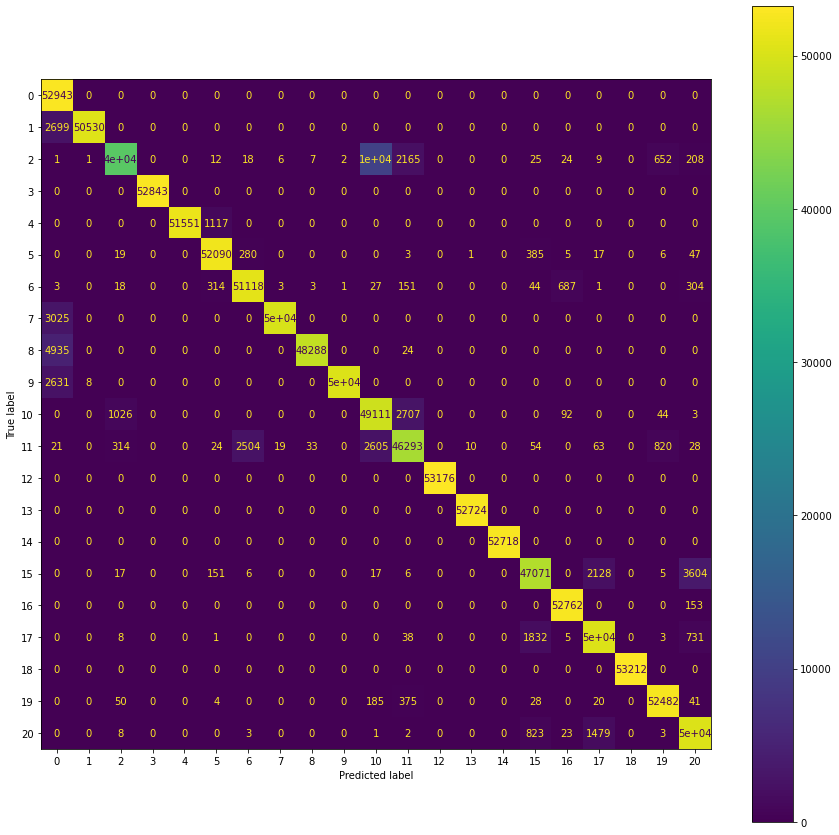

In [254]:
# 테스트 데이터에 대해 predict 수행
# 모델 성능 - confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_true=y_test_1_o, y_pred=yhat_val)
conf_mat

disp = ConfusionMatrixDisplay(conf_mat)
fig,ax=plt.subplots(figsize=(15,15))
#disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(ax=ax)